<a href="https://colab.research.google.com/github/cgrundman/ZTM-TensorFlow-Developer/blob/main/10_milestone_project_3_bitpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 3: BitPredict 💰📈

Let's write some TensorFlow code to predict the price of BitCoin based on the historical price of BitCoin.

Links:
* https://github.com/mrdbourke/tensorflow-deep-learning/
* https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/10_time_series_forecasting_in_tensorflow.ipynb

## Get Data

We're going to be using the historical price data of BitCoin to try and predict the future price of BitCoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin/

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-08-07 07:39:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-08-07 07:39:50 (6.52 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many samples do we have?
len(df)

2787

We've collected the historical price of BitCoin for ~8 years but there's 2787 samples.

Typically, deep learning models usually like lots and lots of samples (where lots and lots can be thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

> **Note:** the seasonality of a times series data set is the number of of samples per year. For the BitCoin dataset, it has a seasonality of 365 or daily.

In [124]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


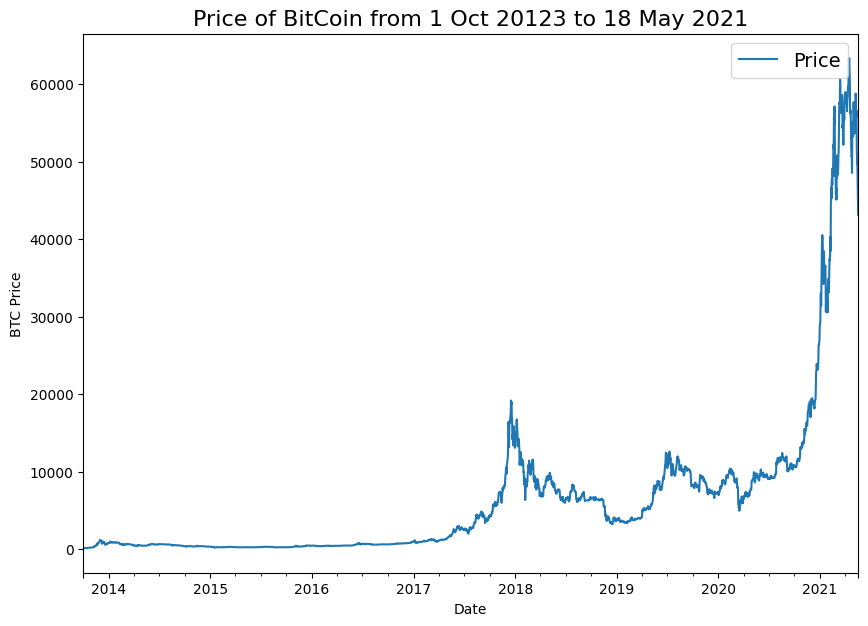

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of BitCoin from 1 Oct 20123 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)
plt.show()

## Importing time series data with Python's CSV module

In [8]:
# Importing and formatting historical BitCoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip the first line
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

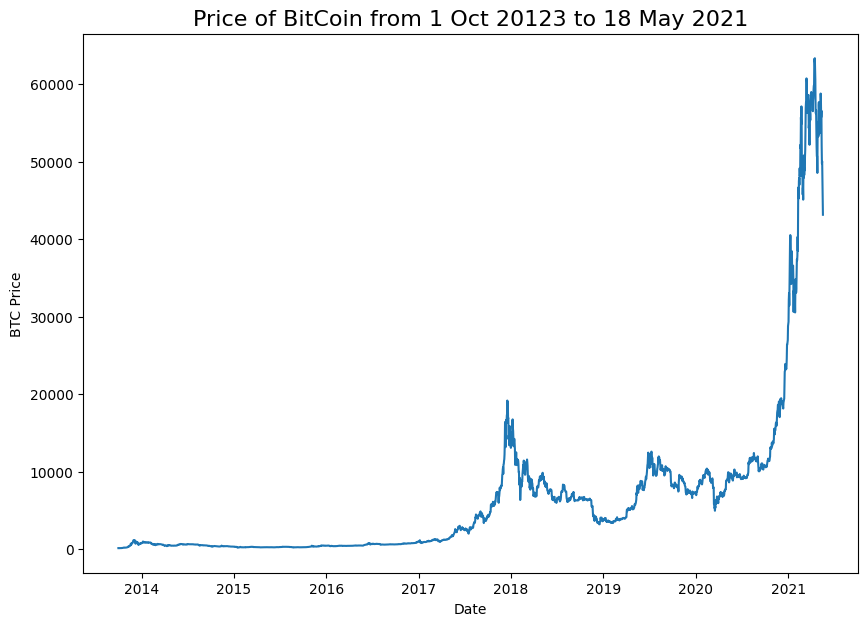

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of BitCoin from 1 Oct 20123 to 18 May 2021", fontsize=16)
plt.xlabel("Date");

## Format Data Part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data the wrong way

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

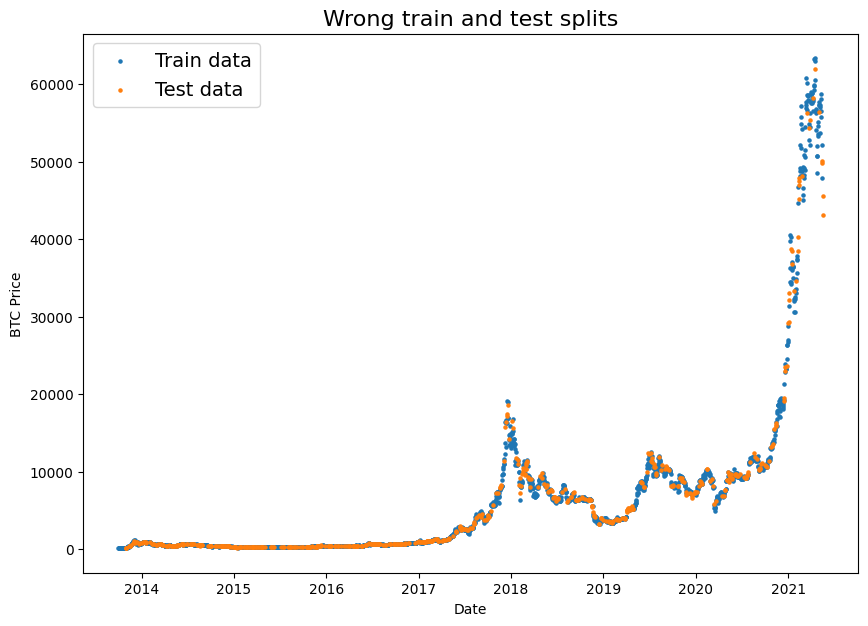

In [12]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Wrong train and test splits", fontsize=16)
plt.legend(fontsize=14)
plt.show();

### Create train and test sets the right way

In [13]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices))

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

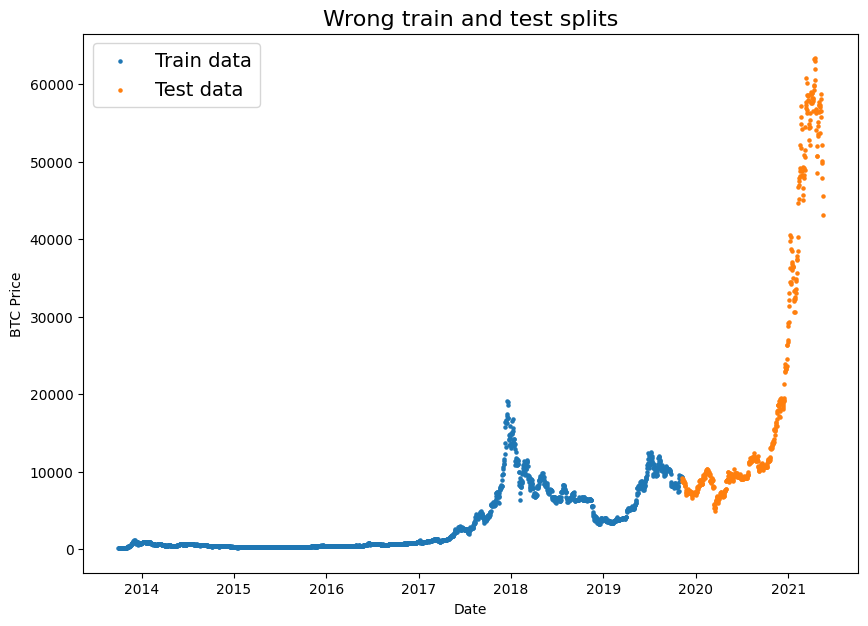

In [14]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Wrong train and test splits", fontsize=16)
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

In [15]:
# Create function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot, default is "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but will index from end of timesteps & values)
  label : label to show on plot about values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

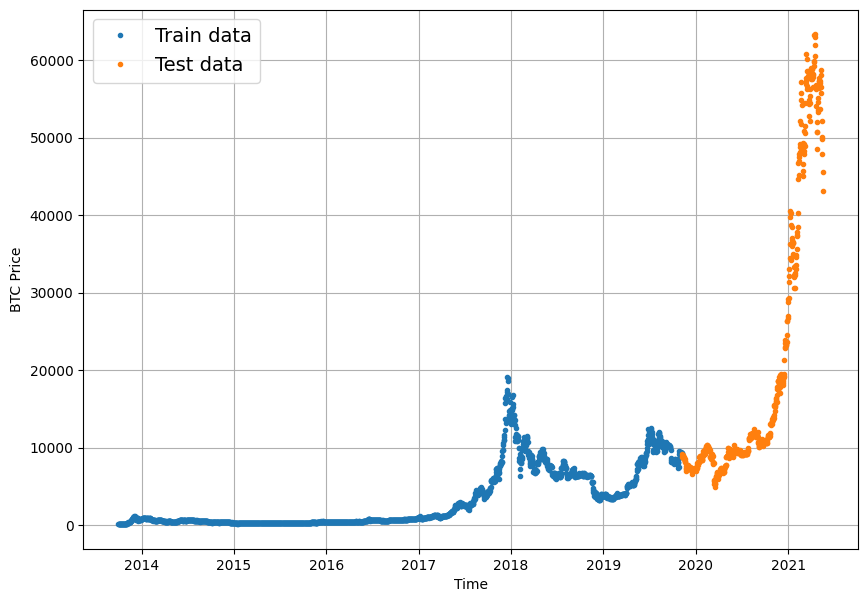

In [16]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modeling Experiments

We've got some BitCoin historical data, to model it, let's run a series of modeling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predic the **horizon**

Modeling Experimentswe're running:
* 0 Naive Model (baseline)
* 1 Dense Model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive Forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (for a horizon of 1)

In [17]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

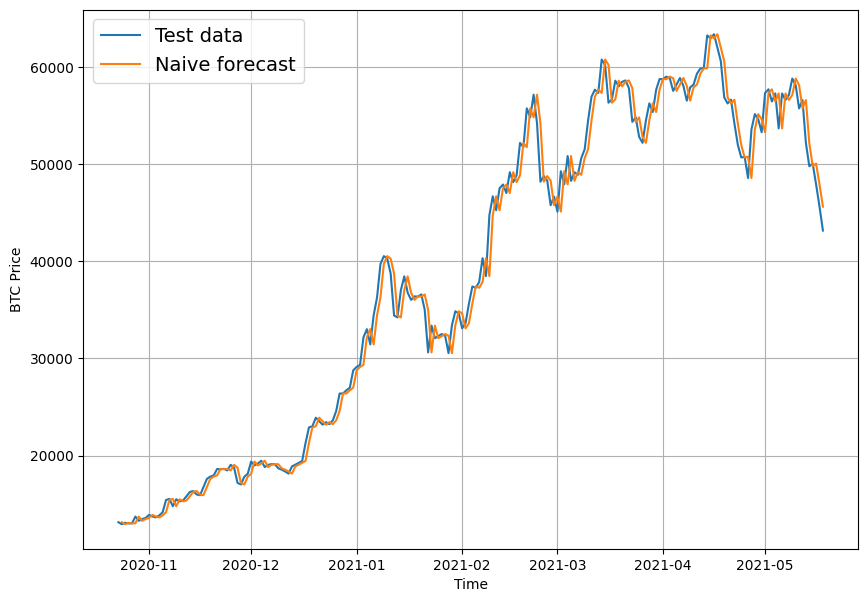

In [18]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive forecast")

### Evaluating a time series model

Let's look into some evaluation metrics for time series forcasting.

What are we doing?

We're predicting a number, so that means we have a forma of a regrassion problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean squared error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

 For all of the above metrics, **lower is better**, for example, an MAE of 0 is better than an MAE of 100.

The main thing we're evalting here is: **how do our model's forecasts (y_preds) compare against the actual values (y_true or ground truth values)?

In [19]:
import tensorflow as tf

In [20]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Calculates the mean absolute scaled error for a forecast.

  Parameters
  ----------
  y_true : array of actual values
  y_pred : array of predicted values
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_forecast = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_forecast

In [21]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [22]:
# Create a function to take in model prediction and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  """
  Function to create MAE, MSE, RMSE, MAPE and MASE evaluation metrics

  Inputs:
  y_true: array of actual values
  y_preds: array of predicted values

  Output:
  Dictionary of evaluation metrics (MAE, MSE, RMSE, MAPE and MASE)
  """
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.reduce_mean(tf.keras.losses.MAE(y_true, y_pred))
  mse = tf.reduce_mean(tf.keras.losses.MSE(y_true, y_pred))
  rmse = tf.sqrt(mse)
  mape = tf.keras.losses.MAPE(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)



  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

That's one good looking evaluation function. Let's see if it works.

In [23]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

### Other models you can use for baseline and for actualn forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forcasting models you may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series data to turn our data into a supervised learning problem.

```
Windowing our dataset
[1, 2, 3, 4, 5, 6] -> [7]
[2, 3, 4, 5, 6, 7] -> [8]
[3, 4, 5, 6, 7, 8] -> [9]
```

In [24]:
# Let's setup global variable for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # se the past week of Bitcoin data to make prediction

In [25]:
# Create a function to label windowed data
def get_labelled_window(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [1, 2, 3, 4, 5, 6, 7] -> Output: ([1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [26]:
# Test out the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
(f"Window: {tf.squeeze(test_window).numpy()}, -> Label: {tf.squeeze(test_label).numpy()}")

'Window: [1 2 3 4 5 6 7], -> Label: 8'

We've got a way to label our windowed data.

However this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/1.21/reference/arrays.indexing.html.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6, 7],
 [2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_window()` funcion we created above to turn the window steps into windows with a specified horizon

> **Resource:** The function we're about to create has been adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [27]:
import numpy as np
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T

  # 3. Index on the target time series
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [28]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


> **Note:** There is a function that does similar to the above in tf.keras.preprocessing: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array

### Turning windows into training and test sets

In [30]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1 - test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [31]:
# Creare train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [32]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

### Make modeling checkpoint

Because our model's performance will fluctuate from experiemnent to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model's performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [33]:
import os

# Create a function to implement a ModelCheckPoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  """
  Creates a ModelCheckpoint object with appropriate parameters to save a model.
  """
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model json
                                            verbose=0, # only output a limited mount of text
                                            save_best_only=True) # save only the best model to file

## Model 1: Dense model (window=7, horizon=1)

Our first deep model is going to be a simple dense model:
* A single dense layer qith 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values? Previous experimentation.

* *Hyperparameters* = values a machine learning practitioner can adjust themselves
* *Parameters* = values a model learns on it's own

In [34]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Create model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# 2. Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit model
model_1_history = model_1.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=f"{model_1.name}.keras")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1440.9670 - mae: 1440.9670 - mse: 6334537.5000 - val_loss: 2370.9023 - val_mae: 2370.9023 - val_mse: 13626451.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 281.6610 - mae: 281.6610 - mse: 291895.0000 - val_loss: 1186.6566 - val_mae: 1186.6566 - val_mse: 4454786.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 195.0228 - mae: 195.0228 - mse: 168426.6719 - val_loss: 963.6240 - val_mae: 963.6240 - val_mse: 3047036.5000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 165.6391 - mae: 165.6391 - mse: 146588.5156 - val_loss: 977.7292 - val_mae: 977.7292 - val_mse: 2964339.5000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 162.2263 - mae: 162.2263 - mse: 136374.0469 - val_loss: 917.0413 - val_mae: 917.0413 - val_mse: 2717590.5000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 156.6221 - mae: 156.6221 - mse: 128706.1562 - val_loss: 898.0338 - val_mae: 898.0338 - val_

In [35]:
# Evaluate on the test data
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 293.6206 - mae: 293.6206 - mse: 350204.2812


[580.8566284179688, 580.8566284179688, 1193191.875]

In [36]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 282.2088 - mae: 282.2088 - mse: 343583.6875 


[566.1278076171875, 566.1278076171875, 1158789.125]

### Making forecasts with a model (on the test dataset)

To make forecasts on the test dataset (note: these won't be actual forecasts, they're only pseudo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [37]:
def make_preds(model, input_data):
  """
  Uses a trained model to make predictions on input data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [38]:
# Make predictions using model_1 on the test datasset and vew results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8842.909 , 8783.218 , 9037.94  , 8779.852 , 8729.035 , 8704.5625,
        8697.562 , 8511.26  , 8445.894 , 8529.692 ], dtype=float32)>)

In [39]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_1_preds)
model_1_results

{'mae': 566.12775,
 'mse': 1158789.1,
 'rmse': 1076.4707,
 'mape': 2.5263562,
 'mase': 0.99452966}

In [40]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

Text(0.5, 1.0, 'Model 1 Predictions')

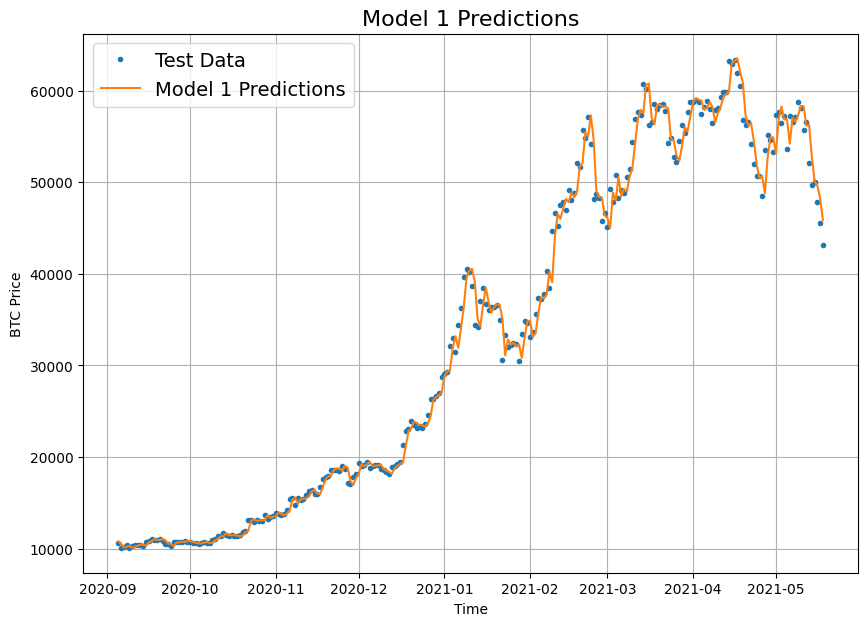

In [41]:
# Let's plot our model 1 predictions
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="Model 1 Predictions")
plt.legend(fontsize=14)
plt.title("Model 1 Predictions", fontsize=16)

## Model 2: Dense (window=30, horizon=1)



In [42]:
HORIZON = 1
WINDOW_SIZE = 30

In [43]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [44]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [45]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [46]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# 2. Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit model
model_2_history = model_2.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              verbose=0,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=f"{model_2.name}.keras")])

In [47]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 301.9498 - mae: 301.9498 - mse: 357995.7500


[592.3253784179688, 592.3253784179688, 1210676.875]

In [48]:
# Load best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 298.9159 - mae: 298.9159 - mse: 359101.7500 


[589.790771484375, 589.790771484375, 1202524.625]

In [49]:
# Get the forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [50]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 589.7908,
 'mse': 1202524.5,
 'rmse': 1096.5968,
 'mape': 2.640398,
 'mase': 1.03096}

In [51]:
model_1_results

{'mae': 566.12775,
 'mse': 1158789.1,
 'rmse': 1076.4707,
 'mape': 2.5263562,
 'mase': 0.99452966}

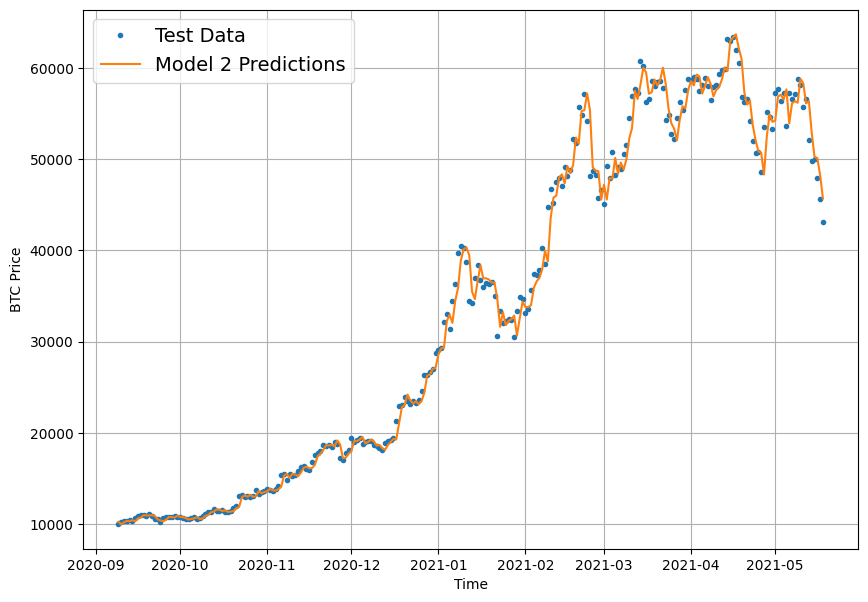

In [52]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format="-",
                 label="Model 2 Predictions")

## Model 3: Dense (window=30, horizon=7)

In [53]:
HORIZON = 7
WINDOW_SIZE = 30

In [54]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [55]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [56]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [57]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# 2. Compile model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit model
model_3_history = model_3.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              verbose=0,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=f"{model_3.name}.keras")])

In [58]:
# Evaluate model 3
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 634.8882 - mae: 634.8882 - mse: 1619233.6250


[1257.6597900390625, 1257.6597900390625, 5516060.0]

In [59]:
# Load best version of model 3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense.keras")
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 631.3077 - mae: 631.3077 - mse: 1591790.3750


[1241.6568603515625, 1241.6568603515625, 5432407.0]

In [60]:
# Make predictions with model 3

In [61]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9382.127, 9420.046, 9581.325, 9468.377, 9433.712, 9488.442,
        9363.044],
       [8933.371, 8904.233, 9205.206, 8888.393, 8955.849, 9059.324,
        8760.351],
       [8874.314, 8749.016, 8961.325, 8704.52 , 8959.28 , 9015.419,
        8604.755],
       [8871.143, 8862.6  , 9013.942, 8838.354, 9038.802, 9137.66 ,
        9017.115],
       [8865.041, 8988.373, 9025.64 , 9028.756, 8977.46 , 9391.478,
        8963.929]], dtype=float32)>

In [62]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_3_preds)
model_3_results

{'mae': 1241.6567,
 'mse': 5432407.0,
 'rmse': 2330.7524,
 'mape': array([ 7.4613886 ,  2.952857  ,  2.379724  ,  3.9932868 ,  5.6620035 ,
         7.4453635 ,  6.746333  ,  4.5490866 ,  4.988104  ,  6.8117843 ,
        10.522598  , 11.907078  , 12.40781   , 11.732943  ,  7.8782387 ,
         4.4876275 ,  3.0853813 ,  3.3740494 ,  2.73338   ,  2.7901678 ,
         2.4972107 ,  3.0401354 ,  5.2703695 ,  4.3229613 ,  2.668348  ,
         1.8185599 ,  2.0787125 ,  2.31781   ,  2.0552392 ,  3.7996144 ,
         4.675672  ,  6.428811  ,  4.2971044 ,  5.6289887 ,  3.9285069 ,
         4.3269467 ,  4.648497  ,  4.4128513 ,  3.1005366 ,  3.4290438 ,
         6.5495944 ,  1.5214635 ,  1.6896423 ,  1.2851688 ,  1.5946319 ,
         1.4693935 ,  1.2884985 ,  1.2143303 ,  1.3831004 ,  1.4584872 ,
         2.35221   ,  2.2628064 ,  3.3978746 ,  3.4432452 ,  3.244992  ,
         5.330226  ,  6.9295316 ,  6.8130574 ,  5.4956203 ,  5.9853325 ,
         4.4900937 ,  2.504574  ,  3.573734  ,  4.032768  

### Make our evaluate function work on larger horizons

In [63]:
# Create a function to take in model prediction and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  """
  Function to create MAE, MSE, RMSE, MAPE and MASE evaluation metrics

  Inputs:
  y_true: array of actual values
  y_preds: array of predicted values

  Output:
  Dictionary of evaluation metrics (MAE, MSE, RMSE, MAPE and MASE)
  """
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.reduce_mean(tf.keras.losses.MAE(y_true, y_pred))
  mse = tf.reduce_mean(tf.keras.losses.MSE(y_true, y_pred))
  rmse = tf.sqrt(mse)
  mape = tf.keras.losses.MAPE(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different size metrics for longer horizons (reduce metrics to single values)
  if mape.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [64]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_3_preds)
model_3_results

{'mae': 1241.6567,
 'mse': 5432407.0,
 'rmse': 2330.7524,
 'mape': 5.6389327,
 'mase': 2.2094586}

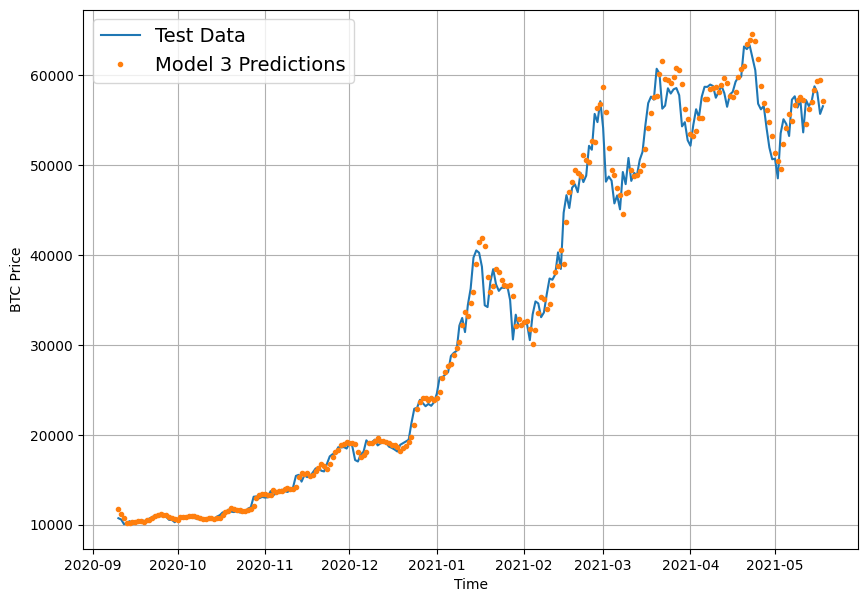

In [65]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format="-",
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 label="Model 3 Predictions")

### Which model is performing best so far?

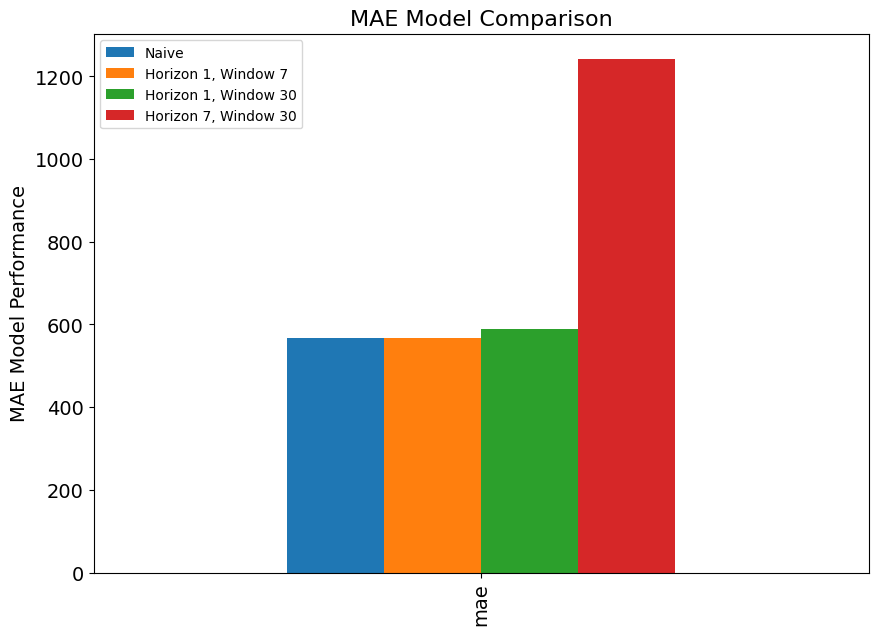

In [66]:
pd.DataFrame({"Naive": model_1_results["mae"],
              "Horizon 1, Window 7": model_1_results["mae"],
              "Horizon 1, Window 30": model_2_results["mae"],
              "Horizon 7, Window 30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar")
plt.title("MAE Model Comparison", fontsize=16)
plt.ylabel("MAE Model Performance", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

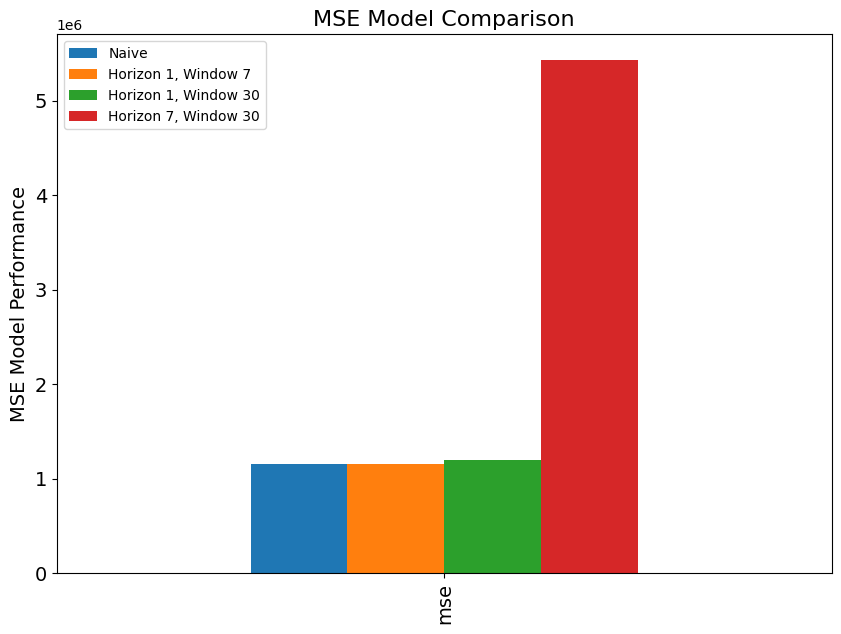

In [67]:
pd.DataFrame({"Naive": model_1_results["mse"],
              "Horizon 1, Window 7": model_1_results["mse"],
              "Horizon 1, Window 30": model_2_results["mse"],
              "Horizon 7, Window 30": model_3_results["mse"]}, index=["mse"]).plot(figsize=(10, 7), kind="bar")
plt.title("MSE Model Comparison", fontsize=16)
plt.ylabel("MSE Model Performance", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

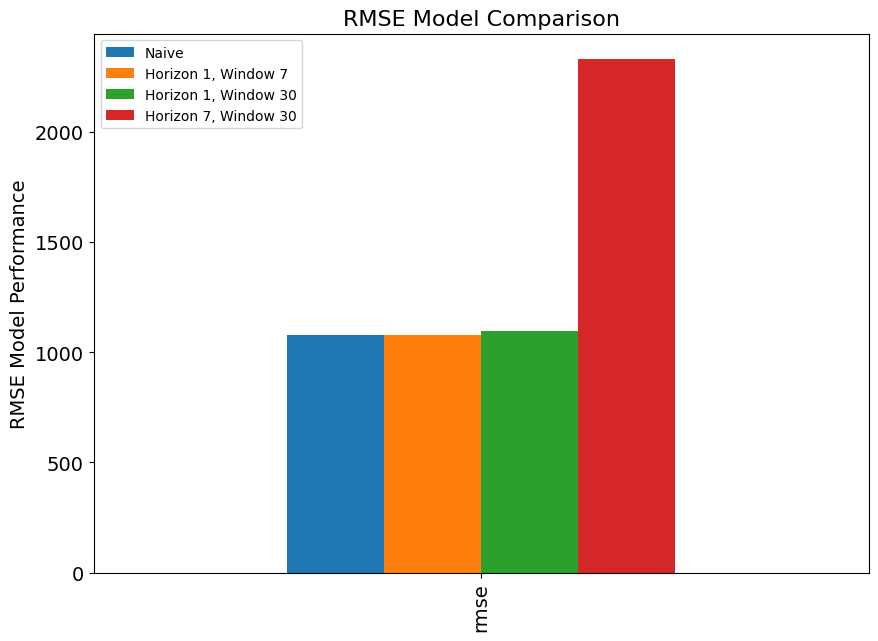

In [68]:
pd.DataFrame({"Naive": model_1_results["rmse"],
              "Horizon 1, Window 7": model_1_results["rmse"],
              "Horizon 1, Window 30": model_2_results["rmse"],
              "Horizon 7, Window 30": model_3_results["rmse"]}, index=["rmse"]).plot(figsize=(10, 7), kind="bar")
plt.title("RMSE Model Comparison", fontsize=16)
plt.ylabel("RMSE Model Performance", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

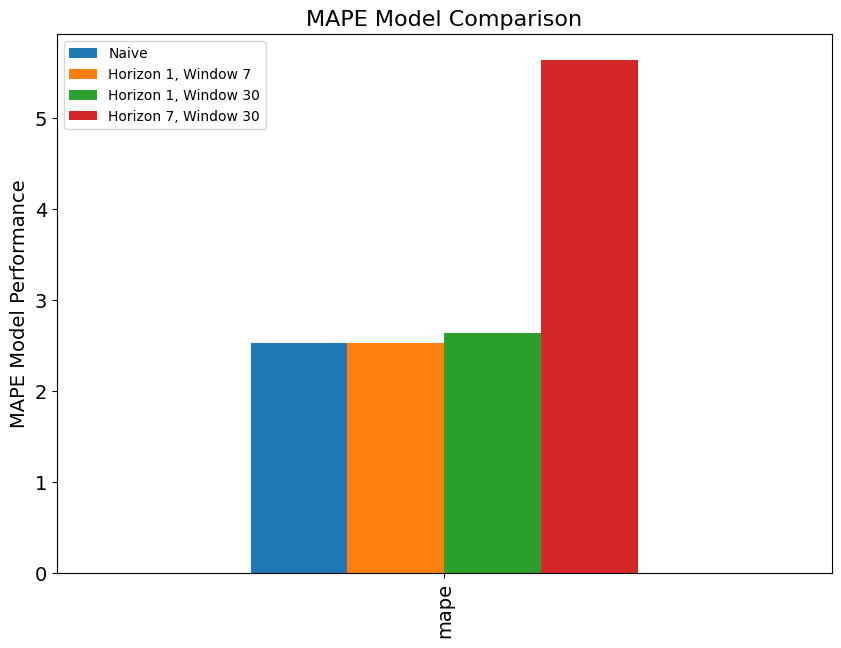

In [69]:
pd.DataFrame({"Naive": model_1_results["mape"],
              "Horizon 1, Window 7": model_1_results["mape"],
              "Horizon 1, Window 30": model_2_results["mape"],
              "Horizon 7, Window 30": model_3_results["mape"]}, index=["mape"]).plot(figsize=(10, 7), kind="bar")
plt.title("MAPE Model Comparison", fontsize=16)
plt.ylabel("MAPE Model Performance", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

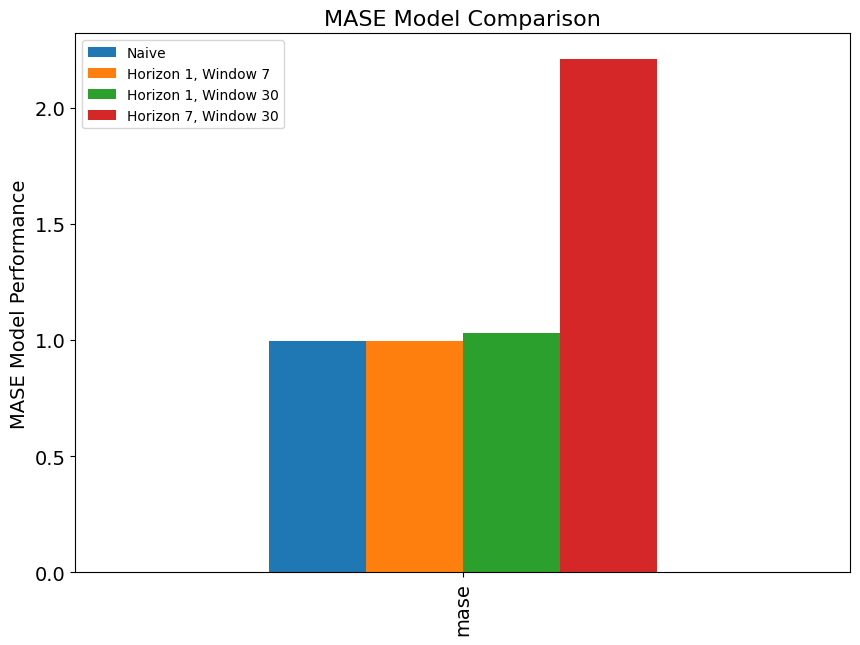

In [70]:
pd.DataFrame({"Naive": model_1_results["mase"],
              "Horizon 1, Window 7": model_1_results["mase"],
              "Horizon 1, Window 30": model_2_results["mase"],
              "Horizon 7, Window 30": model_3_results["mase"]}, index=["mase"]).plot(figsize=(10, 7), kind="bar")
plt.title("MASE Model Comparison", fontsize=16)
plt.ylabel("MASE Model Performance", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Model 4: Conv1D

In [71]:
HORIZON = 1
WINDOW_SIZE = 7

In [72]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [73]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

We need an input shape of: `(batch_size, timestamps, input_dim)`...

However it is not in that shape yet.

In [74]:
# Check data input shape
train_windows[0].shape # returns (window_size)

(7,)

In [75]:
# Before we pass our data to the Conv1D layer, we have to reshape it
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [76]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [77]:
# Test out our lambda layer
print(f"Orignial shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Orignial shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [93]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  expand_dims_layer,
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1d")

# Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model
model_4_history = model_4.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              verbose=0,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=f"{model_4.name}.keras")])

In [94]:
model_4.summary()

Model: "model_4_conv1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [95]:
# Evaluate model 4
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 288.5362 - mae: 288.5362 - mse: 347097.7812


[571.7586059570312, 571.7586059570312, 1179748.5]

In [97]:
# Load best version of model 4
# model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d.keras", safe_mode=False)
# model_4.evaluate(test_windows, test_labels)

# currently a bug in tf, do not load model, 7/8/24

In [98]:
# Make Predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8921.603, 8854.648, 9067.994, 8813.865, 8811.02 ], dtype=float32)>

In [99]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 571.75854,
 'mse': 1179748.4,
 'rmse': 1086.1622,
 'mape': 2.568563,
 'mase': 1.0044214}

## Model 5: RNN (LSTM)

We'll use the same data we created previously.

In [112]:
tf.random.set_seed(42)

# Create the model
inputs = layers.Input(shape=(WINDOW_SIZE, 1))
# x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(inputs)
# x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_lstm")

# Compile the model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model
model_5_history = model_5.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              verbose=0,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=f"{model_5.name}.keras")])

In [113]:
model_5.summary()

Model: "model_5_lstm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 7, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 200,069 (781.52 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 133,380 (521.02 KB)

In [114]:
# Evaluate model
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 369.7347 - mae: 369.7347 - mse: 503328.0938


[713.3427734375, 713.3427734375, 1725595.5]

In [115]:
# Load the best model
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm.keras")
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 348.6368 - mae: 348.6368 - mse: 480122.7188


[692.0687866210938, 692.0687866210938, 1630238.875]

In [116]:
# Make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([9151.257, 8923.31 , 8912.321, 8920.025, 8853.832], dtype=float32)>

In [117]:
# Evaluate predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 692.0689,
 'mse': 1630238.9,
 'rmse': 1276.8081,
 'mape': 3.1295936,
 'mase': 1.2157733}

> **Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however that doesn't mean they'll achieve performant or usable results.

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not someone tweeted that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0
...

What is a better feature to use?

How about bitcoin halving events?

https://stormgain.com/blog/bitcoin-halving-dates-history

In [125]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [131]:
# Let's add the bitcoin halving events to our data
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [132]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [133]:
# Add in block_reward values as a feature in our dataframe
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [134]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [135]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [136]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


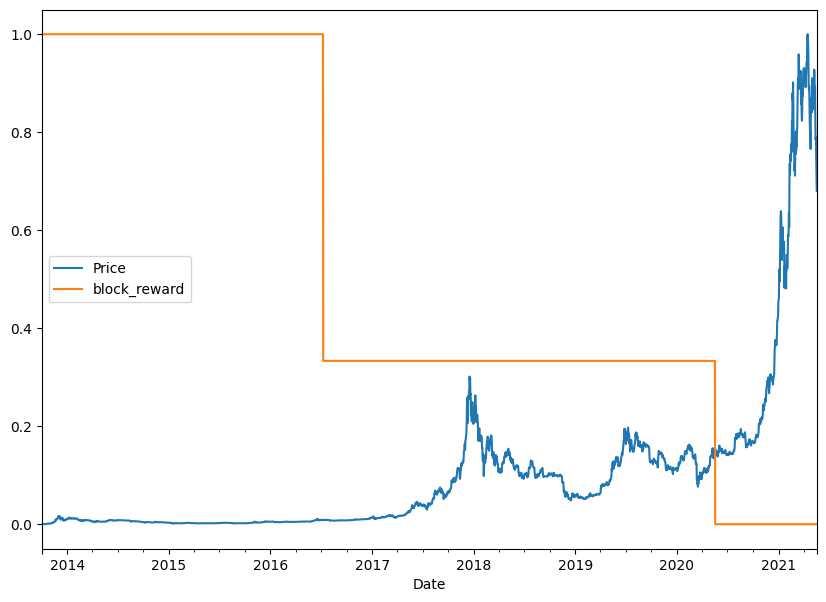

In [140]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can us ethe `pandas.DataFrame.shift()` method to window our multivariate data.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html



In [141]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [142]:
# Make a copy of the BitCoin historical dta with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [143]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [144]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (miltivariate time series)

In [145]:
tf.random.set_seed(42)

# Create model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit model
model_6_history = model_6.fit(x=X_train,
                              y=y_train,
                              epochs=100,
                              verbose=0,
                              batch_size=128,
                              validation_data=(X_test, y_test),
                              callbacks=[create_model_checkpoint(model_name=f"{model_6.name}.keras")])

In [146]:
# Evaluate Model
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 282.6685 - mae: 282.6685 - mse: 343287.4062


[565.5628662109375, 565.5628662109375, 1158029.625]

In [147]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate.keras")
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 282.4154 - mae: 282.4154 - mse: 343359.8750


[565.3364868164062, 565.3364868164062, 1157691.25]

In [148]:
# Make predictions
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8862.212, 8784.424, 9050.198, 8785.534, 8740.271], dtype=float32)>

In [149]:
# Evaluate predictions to get eval metricss
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 565.33655,
 'mse': 1157691.1,
 'rmse': 1075.9606,
 'mape': 2.524528,
 'mase': 0.99313974}

## Model 7: N-BEATS Algorithm

Let's try to create ht ebiggest baddest (though maybe not the boddest, as in, it performs very well...) time series forecasting model we've built so far.

More specifically, we're going to be replicationg the algorithm in Figure 1 from the folowing paper: https://arxiv.org/abs/1905.10437

Why?

* This will allow us to replicate a paper with TensorFlow code
* We will see how to use TensorFLow layer subclassing (to make our own custom layers)
* Get experience using the functional API to create a custom architecture
* Potentially get state-of-the-art results for our problem

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

https://www.tensorflow.org/api_docs/python/tf/keras/Layer

In [155]:
# Create NBeatBlock custom layer
class NBeatsBlock(layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

    # Output of block is a theta layer with linear activation
    self.theta_layer = layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]

    return backcast, forecast

Let's test our NBeatsBlock class.

To do this, we'll use some dummy inputs and outputs.

In [159]:
# Set up dummy NBeatsBlock Layer
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [160]:
# Create dummy inputs (have to be same size as input size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE), axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>

In [161]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are going to be the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.35981137  0.68581235 -0.23334771 -0.44658244  0.2002758  -0.17047134
 -0.05636674]
Forecast: -0.11744191497564316


### Preparing data for the N-BEATS algorithm using tf.data

TO make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide: https://www.tensorflow.org/guide/data_performance

In [162]:
HORIZON = 1
WINDOW_SIZE = 7

In [164]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [165]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [166]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [167]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and feautes by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 128
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The NBEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/abs/1905.10437

In [181]:
# Values from NBeats paper
N_EPOCHS = 50 # 5000 is too long for a CPU
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
N_BLOCKS = 4

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet

In [182]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get Outputs
print(f"Input Tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input Tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stackig using subtract and add layers
7. Put the model inputs and outputs together using the `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of the N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early Stopping - beacause the model will be training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards better performance)

In [183]:
%%time

tf.random.set_seed(42)

# 1. Setup an instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input")

# 3. Create initial backcast and forecast
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)):

  # 5. Use the NBeatsBlock class to calculate the backcast as well as the forecast
  residuals, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  # 6. Create double residual stacking
  residuals = layers.subtract([residuals, block_forecast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                          outputs=forecast,
                          name="model_7_nbeats")

# 8. Compile the model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 9. Fit the model
model_7_history = model_7.fit(x=train_dataset,
                              epochs=N_EPOCHS,
                              validation_data=test_dataset,
                              verbose=0,
                              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                        patience=10,
                                                                        restore_best_weights=True),
                                         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                              patience=5,
                                                                              verbose=1)])


Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
CPU times: user 15min 40s, sys: 26.8 s, total: 16min 7s
Wall time: 14min 49s


In [184]:
# Evaluate N-BEATs model on the test dataset
model_7.evaluate(test_dataset)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 538.3861 - mae: 538.3861 - mse: 1150233.1250


[829.880859375, 829.8807983398438, 2336201.0]

In [185]:
# Make predictions with N-BEATS model
model_7_predicts = make_preds(model_7, test_dataset)
model_7_predicts[:5]

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 659ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([9198.722, 9121.304, 9143.668, 8989.324, 8953.701], dtype=float32)>

In [186]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=tf.squeeze(y_test),
                                 y_pred=model_7_predicts)
model_7_results

{'mae': 829.8807,
 'mse': 2336200.5,
 'rmse': 1528.4635,
 'mape': 3.722956,
 'mase': 1.4578705}

In [187]:
model_1_results

{'mae': 566.12775,
 'mse': 1158789.1,
 'rmse': 1076.4707,
 'mape': 2.5263562,
 'mase': 0.99452966}

In [188]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

Woah... even with all of those special layers and hand crafted network, it looks like the N-BEATS model doesn't perform as well as `model_1` or the original naive forecst.

This goes to show the number of smaller networks as well as the fact not all larger models are better suited for a certain type of data.

### Plotting the N-BEATS architecture we've created

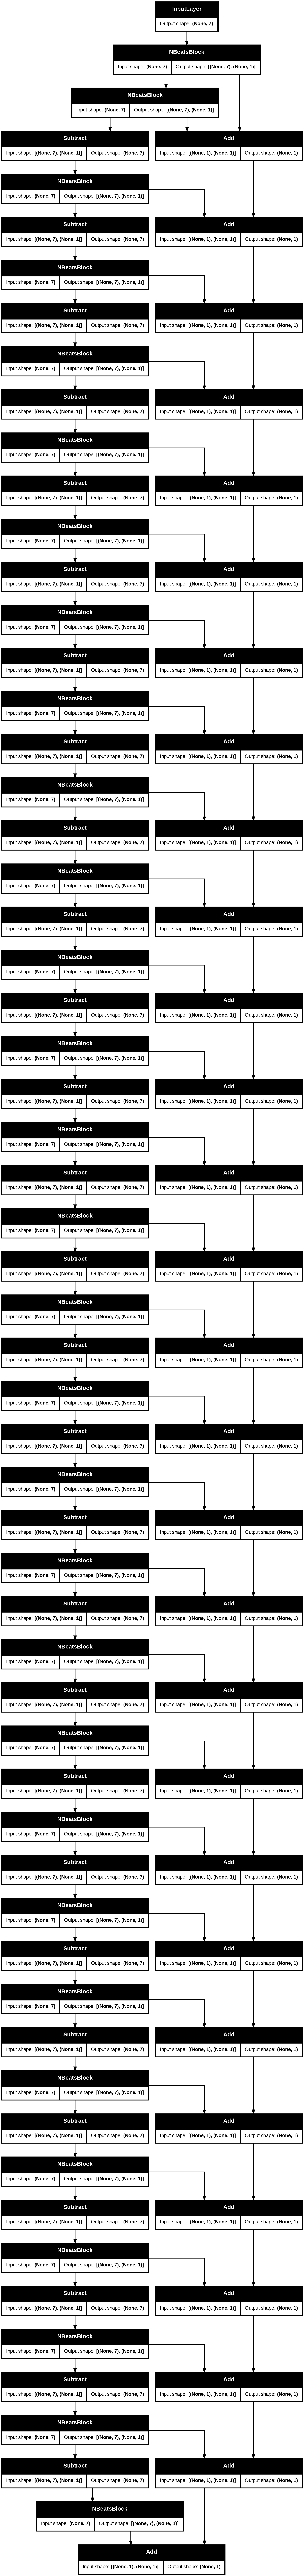

In [189]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes=True)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble model leverages the wisdom of the crowd effect.

It combines many *different* models to predict a common goal.

In [190]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of models (using different loss functions)

In [196]:
def get_ensemble_model(horizon=HORIZON,
                       train_data=train_dataset,
                       test_data=test_dataset,
                       num_iter=10,
                       num_epochs=100,
                       loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models with different loss functions

  For example, if num_iter=10, a list of 30 trained models will be returned:#
  10 * len(["mae", "mse", "mape"])
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model
      model = tf.keras.Sequential([
        layers.Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation="relu"),
        layers.Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation="relu"),
        layers.Dense(horizon)
      ])

      # Compile the model
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=25,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(moniter="val_loss",
                                                                patience=25,
                                                                verbose=1)])
      # Add the trained model to the ensemble
      ensemble_models.append(model)

  return ensemble_models

In [197]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_model(num_iter=5,
                                    num_epochs=100)

Optimizing model by reducing: mae for 100 epochs, model number: 0

Epoch 39: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 100 epochs, model number: 0

Epoch 100: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 100 epochs, model number: 0

Epoch 47: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 100 epochs, model number: 1

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 100 epochs, model number: 1
Optimizing model by reducing: mape for 100 epochs, model number: 1

Epoch 66: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 100 epochs, model number: 2

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 100 epochs, model numbe

### Make predictions with our ensemble model

In [198]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [199]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
CPU times: user 2.66 s, sys: 32.9 ms, total: 2.69 s
Wall time: 7.25 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8725.571,  8672.377,  8902.656, ..., 49929.754, 46533.184,
        44283.887],
       [ 8862.497,  8722.02 ,  8967.994, ..., 48974.223, 48857.25 ,
        47718.375],
       [ 8769.178,  8755.81 ,  9034.852, ..., 49554.273, 47985.996,
        45738.434],
       ...,
       [ 9112.499,  9252.925,  9094.757, ..., 52205.37 , 48704.605,
        48258.066],
       [ 8854.627,  8870.858,  8829.986, ..., 51266.816, 47414.76 ,
        46736.613],
       [ 8765.969,  8781.699,  9110.191, ..., 50172.617, 48402.023,
        45449.78 ]], dtype=float32)>

Our ensemble preds come out in multiple dimensions, but to combine them into **point predictions** we can combine them using mean and median.

In [202]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8880.853 , 8849.257 , 8998.37  , 8702.933 , 8726.4795, 8695.373 ,
       8654.918 , 8538.403 , 8432.901 , 8511.316 ], dtype=float32)>

In [203]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8803.909, 8783.013, 9036.649, 8728.187, 8738.202, 8706.866,
       8676.   , 8517.515, 8437.504, 8526.016], dtype=float32)

In [200]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=tf.squeeze(y_test),
                                  y_pred=tf.squeeze(ensemble_preds))
ensemble_results

{'mae': 700.20483,
 'mse': 1748375.5,
 'rmse': 1322.2615,
 'mape': 3.192022,
 'mase': 1.230066}